 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [217]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import math
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale = pd.read_csv('whale_returns.csv', index_col = 0, parse_dates = True, infer_datetime_format=True)
whale.head(2)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569


In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale = whale.dropna()
whale.head(2)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213


In [5]:
print(f'There are now {(whale.isnull().sum()).sum()} Null Values in the whale dataframe')

There are now 0 Null Values in the whale dataframe


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo = pd.read_csv('algo_returns.csv', index_col = 0, parse_dates = True, infer_datetime_format=True)
algo.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo = algo.dropna()
algo.head(2)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284


In [9]:
print(f'There are now {(algo.isnull().sum()).sum()} Null Values in the algo dataframe')

There are now 0 Null Values in the algo dataframe


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
tsx = pd.read_csv('sp_tsx_history.csv', index_col = 0, parse_dates = True, infer_datetime_format=True)
tsx.head(5)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Check what we need to turn it into
type(algo['Algo 1'][0])

numpy.float64

In [12]:
#Check Data type currently
type(tsx['Close'][0])

str

In [13]:
# Fix Data Types
tsx['Close'] = tsx['Close'].str.replace("$","")
tsx['Close'] = tsx['Close'].str.replace(",","")

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [14]:
#Convert to Float, check if it is float now
tsx['Close'] = tsx['Close'].astype("float")
type(tsx['Close'][0])

numpy.float64

In [15]:
# Calculate Daily Returns
tsx_ret = tsx.pct_change()

In [16]:
# Drop nulls
tsx_ret.dropna(inplace=True)
tsx_ret.head(2)

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563


In [17]:
# Rename `Close` Column to be specific to this portfolio.
tsx_ret.rename(columns = {'Close':'Benchmark'}, inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

df1 = pd.concat([whale, algo, tsx_ret], axis=1, join='inner')
df1

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Benchmark
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

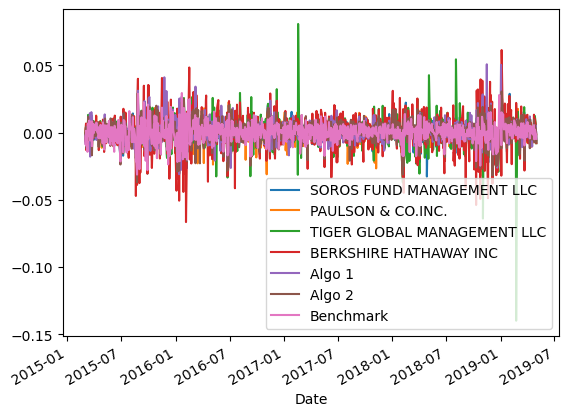

In [20]:
# Plot daily returns of all portfolios
df1.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

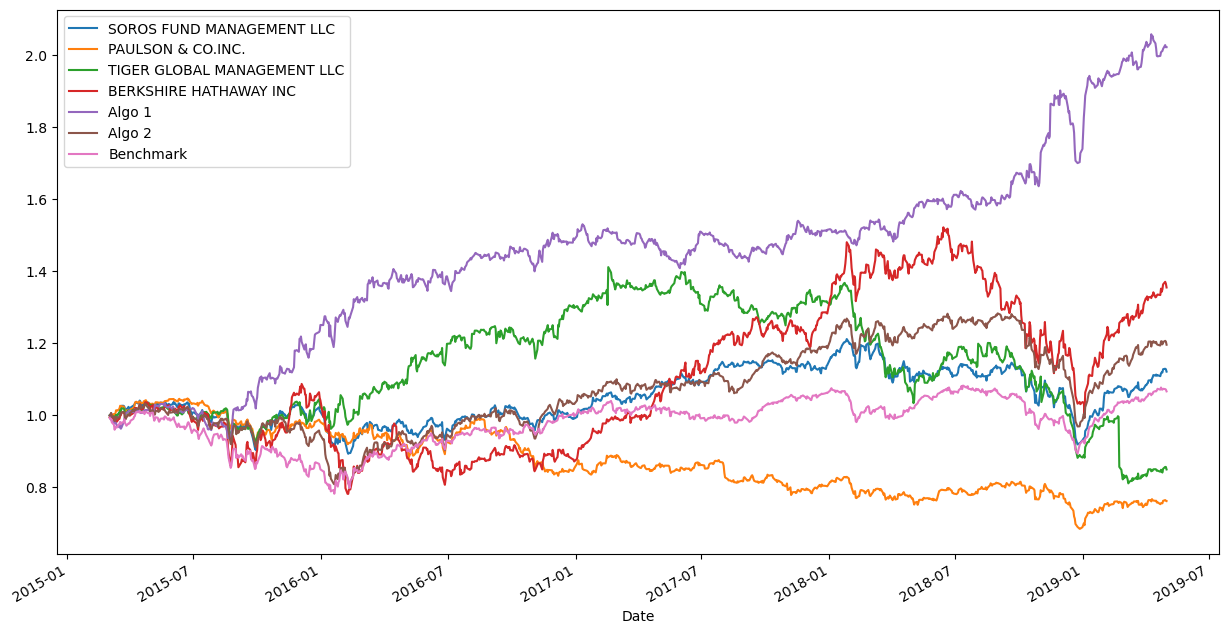

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1+ df1).cumprod()
# Plot cumulative returns
cumulative_return.plot(figsize=[15,8])

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

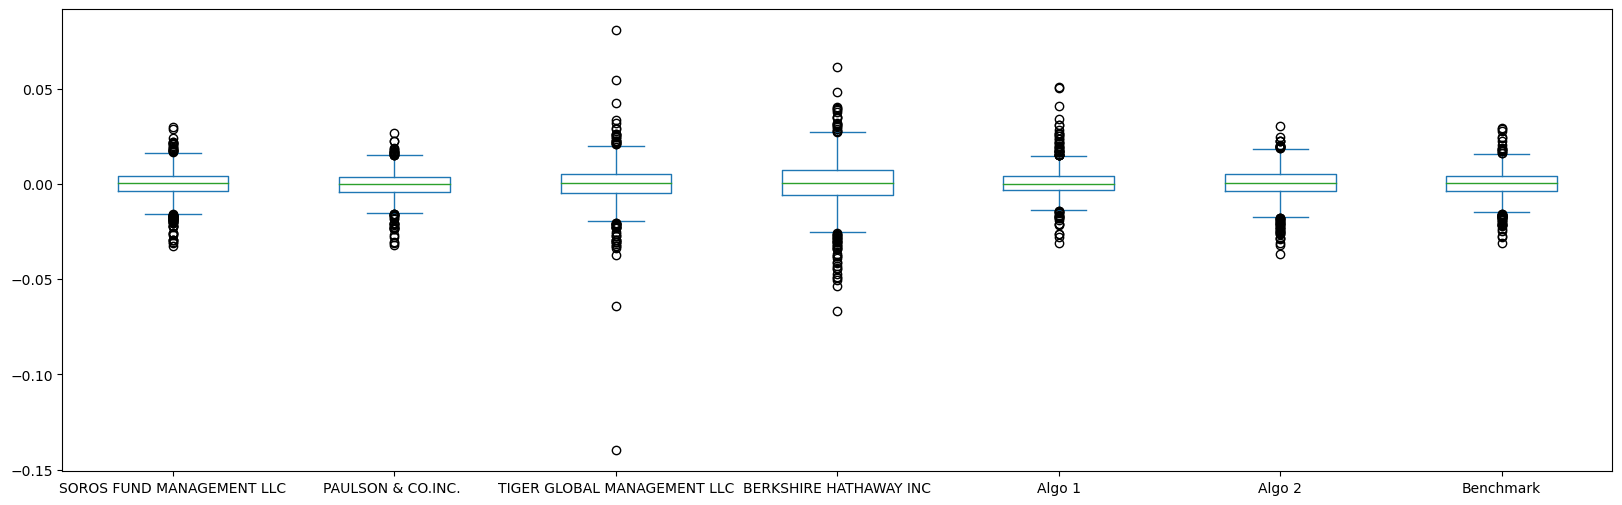

In [24]:
# Box plot to visually show risk
df1.plot(kind="box", figsize=[20,6])

### Calculate Standard Deviations

In [40]:
# Calculate the daily standard deviations of all portfolios
vol = df1.std()
vol

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
Benchmark                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [42]:
# Determine which portfolios are riskier than the S&P TSX 60
for x in vol:
    if x>vol['Benchmark']:
        
        print(f'{x} is the volatility associated with the portfolio that is riskier than S&P TSX60')
print()
print(f'These funds are SORS, TIGER, BERK, Algo 1 and Algo 2')

0.007827576541233951 is the volatility associated with the portfolio that is riskier than S&P TSX60
0.010882785735819496 is the volatility associated with the portfolio that is riskier than S&P TSX60
0.012825516031663223 is the volatility associated with the portfolio that is riskier than S&P TSX60
0.007588882996571315 is the volatility associated with the portfolio that is riskier than S&P TSX60
0.008326359992689701 is the volatility associated with the portfolio that is riskier than S&P TSX60

These funds are SORS, TIGER, BERK, Algo 1 and Algo 2


### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized standard deviation (252 trading days)
annualized_vol = df1.std() * math.sqrt(252)
annualized_vol

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
Benchmark                      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

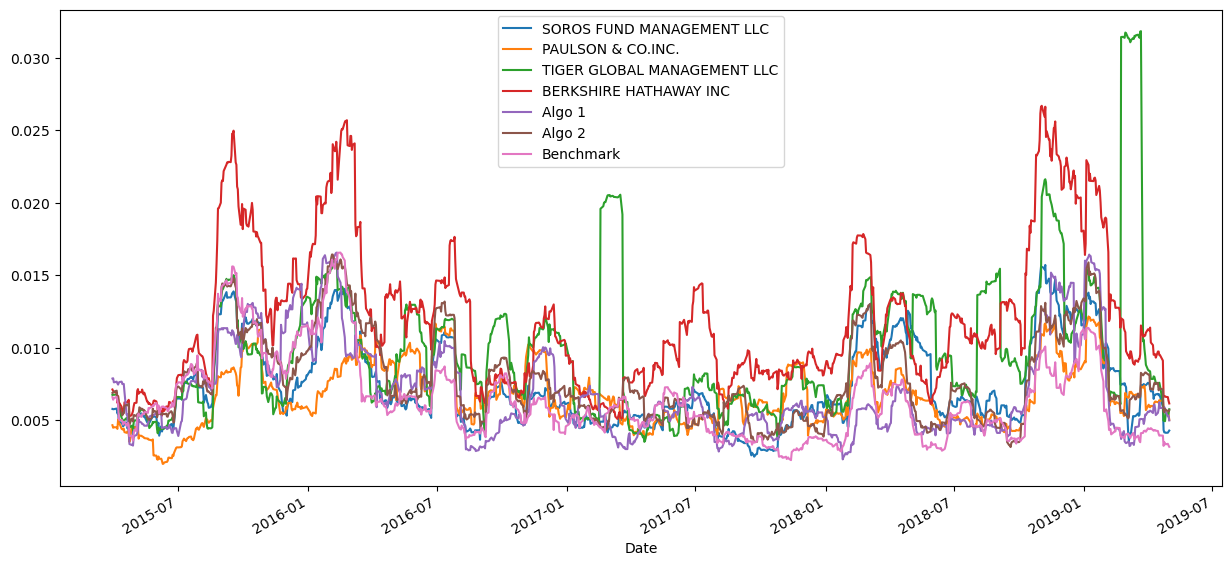

In [65]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll = df1.rolling(window=21).std() 
# Plot the rolling standard deviation
roll.plot(figsize=[15,7])

### Calculate and plot the correlation

In [68]:
# Calculate the correlation
corr = df1.corr()
# Display de correlation matrix
corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Benchmark
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
Benchmark,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [118]:
new1 = pd.DataFrame()
new1['Algo1'] = df1['Algo 1']
new1['TSX'] = df1['Benchmark']
new1


# covv = new1.cov()
# var = new1['Algo1'].var()
 
# beta = covv.loc['Algo1', 'TSX']/var
# beta

0.28759630095736355

<AxesSubplot:xlabel='Date'>

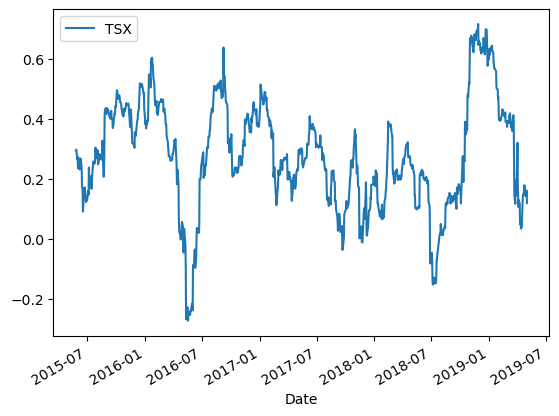

In [205]:
numerator2 = new1.rolling(window=60).cov().unstack()['Algo1']['TSX']

denominator2 = new1['TSX'].to_frame().rolling(window=60).var()


beta = (numerator2/(denominator2.T)).T
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

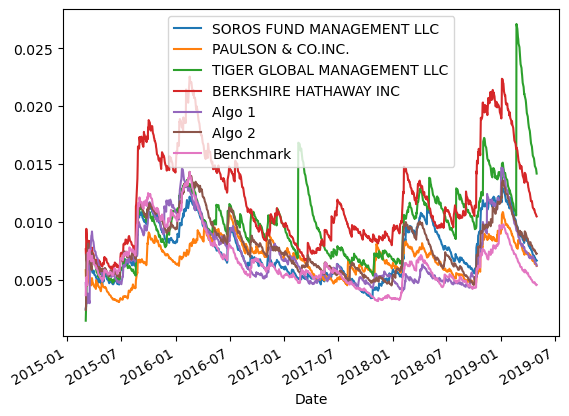

In [122]:
# Use `ewm` to calculate the rolling window
roll2 = df1.ewm(halflife=21).std() 
roll2.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [128]:
# Annualized Sharpe Ratios
sr = ((df1.mean() * 252) / annualized_vol)
sr

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
Benchmark                      0.195550
dtype: float64

<AxesSubplot:>

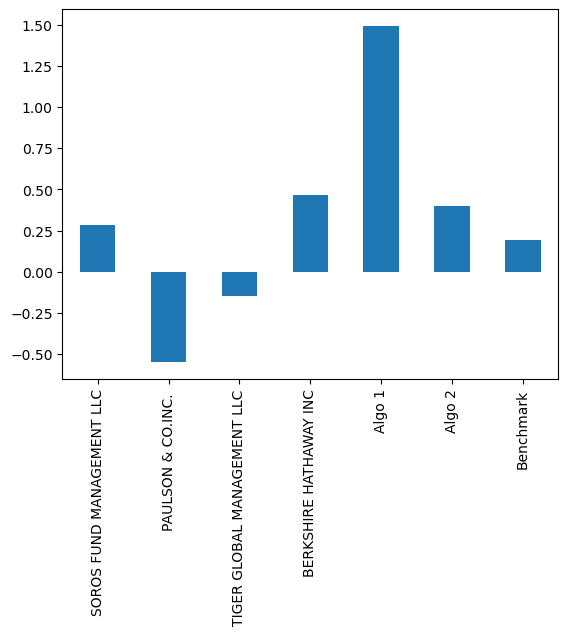

In [129]:
# Visualize the sharpe ratios as a bar plot
sr.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
*Algo 1 outperforms the benchmark and all the whales in terms of sharpe ratio, whereas algo 2 outperforms all but Berkshire Hathaway*

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [135]:
# Reading data from 1st stock
otex = pd.read_csv('otex_historical.csv', index_col = 1, parse_dates = True, infer_datetime_format=True)
otex.head(2)

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07


In [136]:
# Reading data from 2nd stock
shop = pd.read_csv('shop_historical.csv', index_col = 1, parse_dates = True, infer_datetime_format=True)
shop.head(2)

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15


In [137]:
# Reading data from 3rd stock
l = pd.read_csv('l_historical.csv', index_col = 1, parse_dates = True, infer_datetime_format=True)
l.head(2)

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41


In [150]:
# Combine all stocks in a single DataFrame

df5 = pd.concat([otex['Close'], shop['Close'], l['Close']], axis=1, join='inner')
df5.columns = ['otex', 'shop', 'l']
df6 = df5.pct_change().dropna()

In [151]:
df6

,otex,shop,l
Date,,,
2018-01-03,-0.011703,0.023398,-0.010002
2018-01-04,-0.003715,0.017092,0.000174
2018-01-05,-0.007924,-0.001455,0.000000
2018-01-08,-0.009631,0.016392,-0.009753
2018-01-09,-0.000712,-0.011254,0.008969
...,...,...,...
2019-12-20,0.024441,-0.005503,0.003547
2019-12-23,-0.013463,-0.003118,-0.003240
2019-12-24,-0.007773,0.026915,-0.000148


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [164]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_returns5 = weights * df6
# Display sample data
port_returns5['agg'] = port_returns5['otex'] + port_returns5['shop'] + port_returns5['l']
xy = port_returns5['agg']
xy

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Name: agg, Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [165]:
# Join your returns DataFrame to the original returns DataFrame
all_join = pd.concat([xy, df1], axis=1, join='inner')
all_join

,agg,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Benchmark
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [166]:
# Calculate the annualized `std`
annualized_vol2 = all_join.std() * math.sqrt(252)
annualized_vol2

agg                            0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
Benchmark                      0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

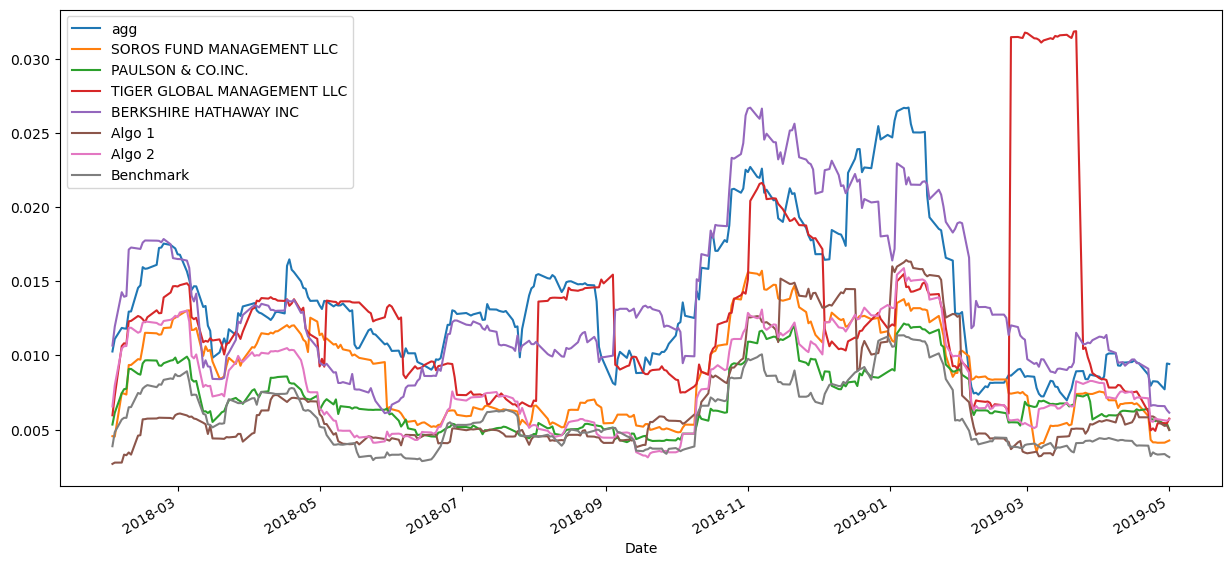

In [167]:
# Calculate rolling standard deviation
rollllll = all_join.rolling(window=21).std()
# Plot rolling standard deviation
rollllll.plot(figsize=[15,7])

### Calculate and plot the correlation

In [168]:
# Calculate and plot the correlation
correl = all_join.corr()
correl

,agg,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Benchmark
agg,1.000000,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228
SOROS FUND MANAGEMENT LLC,0.556093,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681
PAULSON & CO.INC.,0.385305,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.303971,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781
BERKSHIRE HATHAWAY INC,0.647413,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817
Algo 1,0.214770,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789
Algo 2,0.563756,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326
Benchmark,0.579228,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [176]:
# Calculate and plot Beta
calm = pd.DataFrame()
calm['myportfolio'] = all_join['agg']
calm['TSX'] = all_join['Benchmark']

In [194]:
numerator = calm.rolling(window=60).cov().unstack()['myportfolio']['TSX']

In [191]:
denominator = calm['TSX'].to_frame().rolling(window=60).var()

<AxesSubplot:xlabel='Date'>

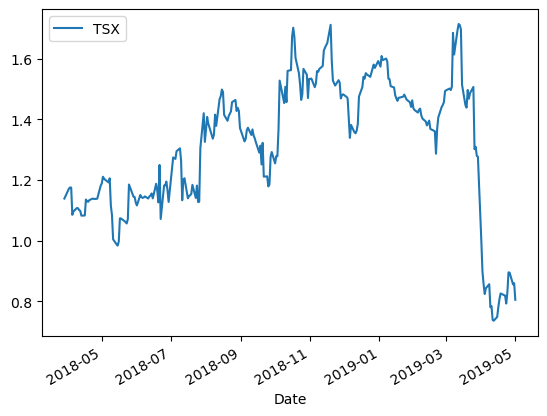

In [202]:
beta2 = (numerator/(denominator.T)).T
beta2.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:>

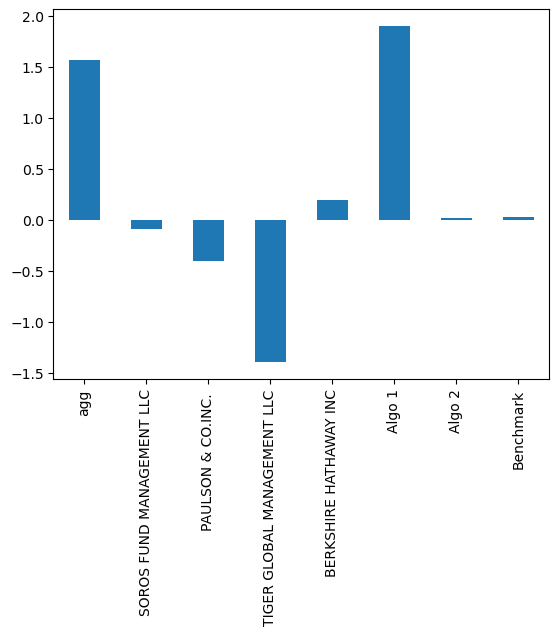

In [207]:
# Calculate Annualized Sharpe Ratios
sr2 = (all_join.mean() * 252) / annualized_vol2
sr2.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [210]:
sr2.sort_values(ascending =False)

Algo 1                         1.901461
agg                            1.564547
BERKSHIRE HATHAWAY INC         0.195907
Benchmark                      0.034651
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

In [212]:
annualized_vol2.sort_values(ascending =False)

BERKSHIRE HATHAWAY INC         0.227445
agg                            0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
Benchmark                      0.099121
dtype: float64

<AxesSubplot:xlabel='Date'>

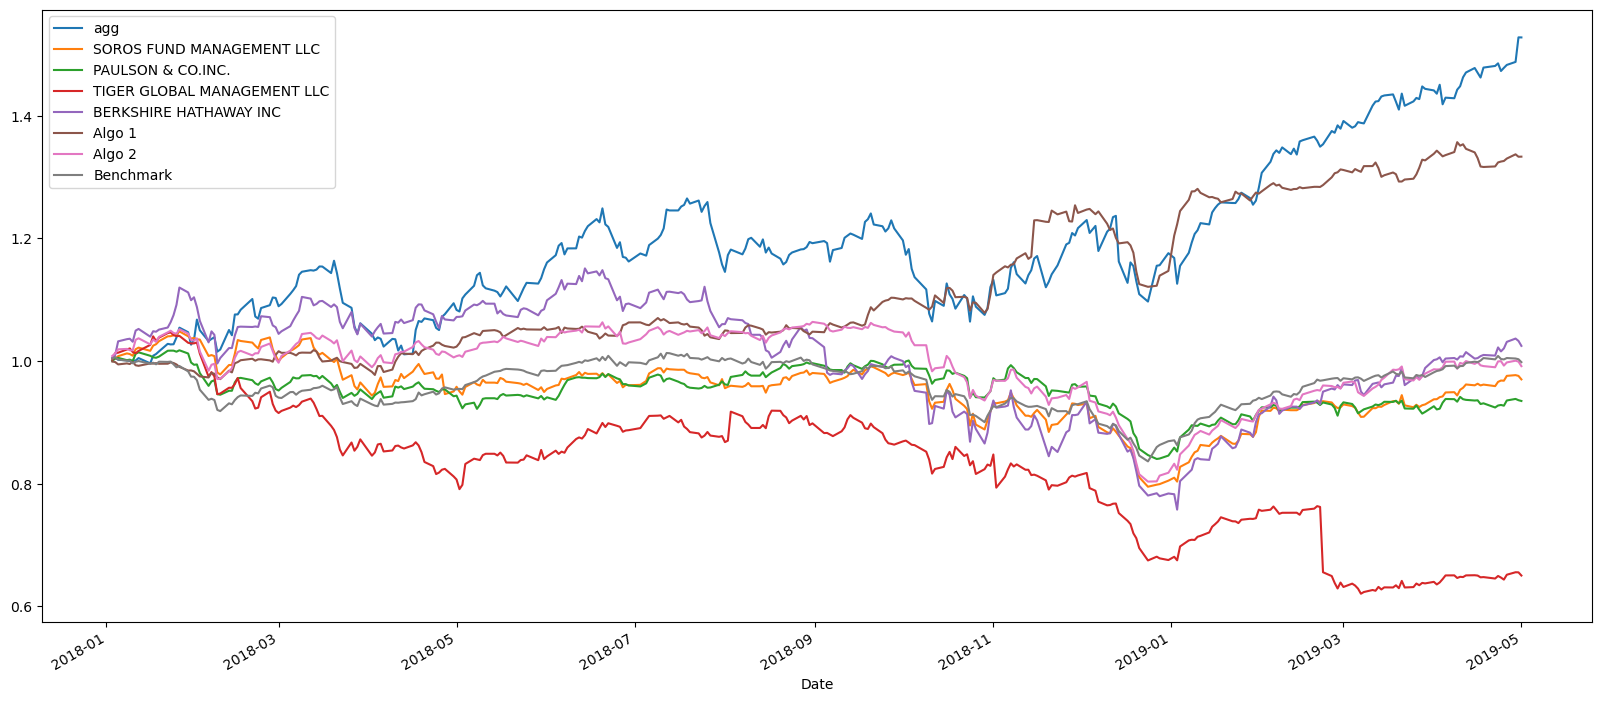

In [216]:
total_vibes = (1+ all_join).cumprod()
total_vibes.plot(figsize=[20,9])

As seen above, on a risk-adjusted basis, Algo 1 still beats the 'agg' (our portfolio). On a pure returns basis, 'agg' is the top performer closely follow by Algo 1, however 'agg' takes a much rockier ride (much higher volatility) than Algo 1. Compared to the TSX however, the 'agg' portfolio is far superior.

   - One thing to note however is the choice of benchmark being the TSX given all 3 of the 'agg' portfolio stocks are listed on the US market and not the canadian market. Given the US's superior performance to the Canadian market between 2018 - 2019, it may be unfair to use the TSX as a benchmark given that part of the risk that drives those US stocks would be the US market beta as a whole 